In [1]:
import pandas as pd
%pylab inline
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# In this Logistic Regression, I am going to be predicting how many failures a student will get based off of other numerical factors

data = pd.read_csv("~/Downloads/student/student-mat.csv",sep=';')

In [21]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,9.0
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,15.0
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,12.0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,6.0
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,18.0
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,15.0


In [24]:
dataCount = 79
iterator = 0
chosenIndices = []
g1 =[]
g2 = []

for i in range(10):
    if data[np.randint(0,78)] not in chosenIndices:
        
        chosenIndices.append(data[np.randint(0,78)])

SyntaxError: can't assign to literal (<ipython-input-24-12cbc9ea6ea2>, line 9)

In [20]:
#create avg grade column
data['avg_grade'] = round((data['G1']+data['G2']+data['G3'])/3,0)

data.groupby('age').mean()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade
age,,,,,,,,,,,,,,,,
15,3.036585,2.756098,1.365854,2.158537,0.268293,4.000000,3.280488,2.743902,1.353659,1.902439,3.585366,3.341463,11.231707,11.365854,11.256098,11.292683
16,2.826923,2.576923,1.403846,1.875000,0.230769,3.836538,3.230769,3.173077,1.432692,2.278846,3.701923,5.451923,10.942308,11.182692,11.028846,10.990385
17,2.612245,2.469388,1.459184,2.020408,0.244898,3.908163,3.224490,3.204082,1.520408,2.571429,3.500000,6.459184,10.897959,10.479592,10.275510,10.530612
18,2.707317,2.475610,1.585366,2.146341,0.292683,4.024390,3.121951,3.304878,1.548780,2.414634,3.439024,6.048780,10.719512,10.134146,9.548780,10.121951
19,2.166667,2.041667,1.458333,2.083333,1.166667,3.875000,3.250000,2.916667,1.458333,1.958333,3.500000,10.458333,10.250000,9.250000,8.208333,9.291667
20,3.000000,2.000000,1.333333,2.000000,1.333333,5.000000,4.666667,3.333333,2.000000,2.333333,4.000000,5.000000,13.666667,13.666667,14.000000,14.000000
21,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,8.000000,7.000000,8.000000
22,3.000000,1.000000,1.000000,1.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,16.000000,6.000000,8.000000,8.000000,7.000000


In [3]:
data.groupby(['age','sex']).mean()

Medu      Fedu  traveltime  studytime  failures    famrel  \
age sex                                                                  
15  F    2.789474  2.578947    1.342105   2.263158  0.421053  3.947368   
    M    3.250000  2.909091    1.386364   2.068182  0.136364  4.045455   
16  F    2.759259  2.555556    1.333333   2.074074  0.259259  3.722222   
    M    2.900000  2.600000    1.480000   1.660000  0.200000  3.960000   
17  F    2.637931  2.482759    1.344828   2.327586  0.120690  3.810345   
    M    2.575000  2.450000    1.625000   1.575000  0.425000  4.050000   
18  F    2.627907  2.488372    1.651163   2.395349  0.186047  4.186047   
    M    2.794872  2.461538    1.512821   1.871795  0.410256  3.846154   
19  F    2.142857  2.000000    1.357143   2.500000  1.142857  3.785714   
    M    2.200000  2.100000    1.600000   1.500000  1.200000  4.000000   
20  F    4.000000  2.000000    2.000000   3.000000  2.000000  5.000000   
    M    2.500000  2.000000    1.000000   1.500000  1.000000  5.000000   
21  M    1.000000  1.000000    1.000000   1.000000  3.000000  5.000000   
22  M    3.000000  1.000000    1.000000   1.000000  3.000000  5.000000   

         freetime     goout      Dalc      Walc    health   absences  \
age sex                                                                
15  F    2.921053  2.657895  1.315789  1.842105  3.500000   3.894737   
    M    3.590909  2.818182  1.386364  1.954545  3.659091   2.863636   
16  F    3.092593  3.222222  1.240741  2.037037  3.462963   5.888889   
    M    3.380000  3.120000  1.640000  2.540000  3.960000   4.980000   
17  F    2.982759  2.965517  1.241379  2.120690  3.275862   6.913793   
    M    3.575000  3.550000  1.925000  3.225000  3.825000   5.800000   
18  F    3.046512  3.279070  1.232558  1.767442  3.279070   6.069767   
    M    3.205128  3.333333  1.897436  3.128205  3.615385   6.025641   
19  F    2.857143  2.785714  1.285714  1.928571  3.285714  11.500000   
    M    3.800000  3.100000  1.700000  2.000000  3.800000   9.000000   
20  F    4.000000  3.000000  1.000000  1.000000  3.000000   4.000000   
    M    5.000000  3.500000  2.500000  3.000000  4.500000   5.500000   
21  M    5.000000  3.000000  3.000000  3.000000  3.000000   3.000000   
22  M    4.000000  5.000000  5.000000  5.000000  1.000000  16.000000   

                G1         G2         G3  avg_grade  
age sex                                              
15  F    10.052632   9.789474   9.552632   9.789474  
    M    12.250000  12.727273  12.727273  12.590909  
16  F    10.203704  10.722222  10.537037  10.425926  
    M    11.740000  11.680000  11.560000  11.600000  
17  F    11.103448  10.879310  10.482759  10.793103  
    M    10.600000   9.900000   9.975000  10.150000  
18  F    10.883721   9.976744   9.325581  10.023256  
    M    10.538462  10.307692   9.794872  10.230769  
19  F    10.642857   9.714286   8.357143   9.571429  
    M     9.700000   8.600000   8.000000   8.900000  
20  F    15.000000  14.000000  15.000000  15.000000  
    M    13.000000  13.500000  13.500000  13.500000  
21  M    10.000000   8.000000   7.000000   8.000000  
22  M     6.000000   8.000000   8.000000   7.000000

In [4]:
#data avgs
data.groupby('failures').mean()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade
failures,,,,,,,,,,,,,,,,
0,16.506410,2.884615,2.647436,1.423077,2.102564,3.967949,3.198718,3.051282,1.416667,2.205128,3.490385,5.134615,11.467949,11.349359,11.253205,11.330128
1,17.520000,2.260000,2.160000,1.460000,1.860000,3.920000,3.340000,3.240000,1.680000,2.500000,3.860000,9.420000,9.560000,9.260000,8.120000,8.980000
2,16.941176,2.647059,2.411765,1.647059,1.882353,3.470588,3.058824,3.117647,1.764706,2.647059,3.705882,6.705882,8.352941,7.352941,6.235294,7.352941
3,17.562500,1.750000,1.312500,1.687500,1.437500,4.062500,3.812500,3.812500,1.812500,2.937500,3.687500,4.250000,6.937500,6.437500,5.687500,6.375000


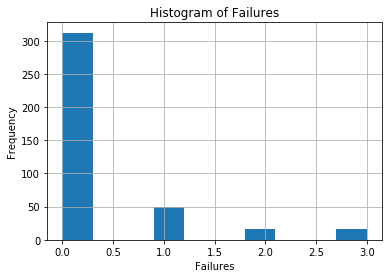

In [5]:
#failures bar graph
data.failures.hist()
plt.title('Histogram of Failures')
plt.xlabel("Failures")
plt.ylabel("Frequency")

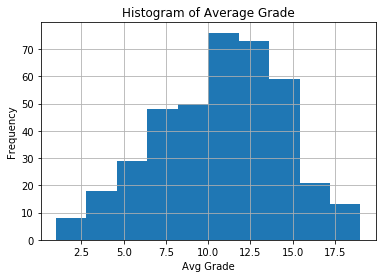

In [6]:
#how many students have each grade
data['avg_grade'].hist()
plt.title('Histogram of Average Grade')
plt.xlabel('Avg Grade')
plt.ylabel('Frequency')

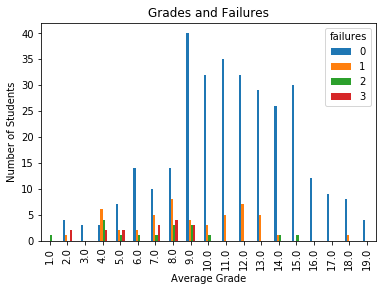

In [7]:
#bar graph
pd.crosstab(data['avg_grade'],data.failures).plot(kind='bar')
plt.title('Grades and Failures')
plt.xlabel('Average Grade')
plt.ylabel('Number of Students')

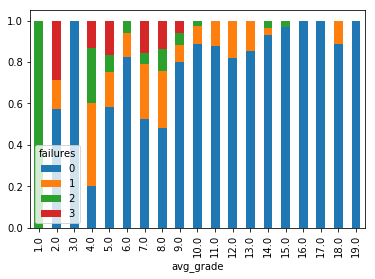

In [8]:
#graph of avg grades and failures
grades = pd.crosstab(data['avg_grade'],data.failures)
grades.div(grades.sum(1), axis=0).plot(kind='bar', stacked = True)

In [9]:
#creating dataframes for variables
y,X = dmatrices('failures~ Medu + Fedu + traveltime + studytime + famrel + freetime + goout + Dalc + Walc + health + absences + avg_grade',data, return_type = 'dataframe')
print(X.columns)

#flatten y into a 1-D array
y = np.ravel(y)

Index(['Intercept', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'avg_grade'],
      dtype='object')


In [10]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X,y)

0.78481012658227844

In [11]:
#null error rate
1-y.mean()

0.66582278481012658

In [12]:
#analyzing coefficients to improve regression
pd.DataFrame(X.columns, np.transpose(model.coef_[0]))

,0
-0.670548,Intercept
0.399969,Medu
0.229361,Fedu
0.045396,traveltime
0.166661,studytime
0.150079,famrel
-0.180385,freetime
-0.089375,goout
-0.249252,Dalc
0.005726,Walc


In [13]:
#creating groups based off of grades
df1 = pd.DataFrame(data, columns=['sex', "avg_grade"])
df2 = pd.DataFrame(data, columns=['sex', 'failures', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'])
bins = [0,4,9,14,20]
group_names = ['0-4','5-10','10-14','15-20']
grade_groups = pd.cut(df1['avg_grade'],bins, labels = group_names)
df1['grade_groups']= pd.cut(df1['avg_grade'],bins, labels = group_names)
df2.head(10)

,sex,failures,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,0,4,4,2,2,4,3,4,1,1,3,6
1,F,0,1,1,1,2,5,3,3,1,1,3,4
2,F,3,1,1,1,2,4,3,2,2,3,3,10
3,F,0,4,2,1,3,3,2,2,1,1,5,2
4,F,0,3,3,1,2,4,3,2,1,2,5,4
5,M,0,4,3,1,2,5,4,2,1,2,5,10
6,M,0,2,2,1,2,4,4,4,1,1,3,0
7,F,0,4,4,2,2,4,1,4,1,1,1,6
8,M,0,3,2,1,2,4,2,2,1,1,1,0
9,M,0,3,4,1,2,5,5,1,1,1,5,0


In [14]:
df2['grade_groups'] = df1['grade_groups']
df2['avg_grade'] = df1['avg_grade']
df2

,sex,failures,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,grade_groups,avg_grade
0,F,0,4,4,2,2,4,3,4,1,1,3,6,5-10,6.0
1,F,0,1,1,1,2,5,3,3,1,1,3,4,5-10,5.0
2,F,3,1,1,1,2,4,3,2,2,3,3,10,5-10,8.0
3,F,0,4,2,1,3,3,2,2,1,1,5,2,15-20,15.0
4,F,0,3,3,1,2,4,3,2,1,2,5,4,5-10,9.0
5,M,0,4,3,1,2,5,4,2,1,2,5,10,15-20,15.0
6,M,0,2,2,1,2,4,4,4,1,1,3,0,10-14,12.0
7,F,0,4,4,2,2,4,1,4,1,1,1,6,5-10,6.0
8,M,0,3,2,1,2,4,2,2,1,1,1,0,15-20,18.0
9,M,0,3,4,1,2,5,5,1,1,1,5,0,15-20,15.0


In [16]:
y,Z = dmatrices('failures~ Medu + Fedu + traveltime + studytime + famrel + freetime + goout + Dalc + Walc + health + absences + grade_groups',data, return_type = 'dataframe')
print(Z.columns)

y = np.ravel(y)

Z.head(100)

Index(['Intercept', 'grade_groups[T.5-10]', 'grade_groups[T.10-14]',
       'grade_groups[T.15-20]', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')


,Intercept,grade_groups[T.5-10],grade_groups[T.10-14],grade_groups[T.15-20],Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.0,1.0,0.0,0.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,6.0
1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0
2,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0
3,1.0,0.0,0.0,1.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0
4,1.0,1.0,0.0,0.0,3.0,3.0,1.0,2.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0
5,1.0,0.0,0.0,1.0,4.0,3.0,1.0,2.0,5.0,4.0,2.0,1.0,2.0,5.0,10.0
6,1.0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,1.0,1.0,3.0,0.0
7,1.0,1.0,0.0,0.0,4.0,4.0,2.0,2.0,4.0,1.0,4.0,1.0,1.0,1.0,6.0
8,1.0,0.0,0.0,1.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0
9,1.0,0.0,0.0,1.0,3.0,4.0,1.0,2.0,5.0,5.0,1.0,1.0,1.0,5.0,0.0


In [18]:
model1 = LogisticRegression()
model1 = model1.fit(Z,y)

model1.score(Z,y)

0.78481012658227844

In [19]:
y.mean()
# The model had a 78.48% chance of success, versus a 66.6% null error rate, so it is 12% better than just guessing the same number of failures every time. Additionally, grouping people by grades did not improve the model.

0.33417721518987342